# Test Code of Result Analysis

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Make Reference Path

In [25]:
def make_path():
    """
    Function to generate reference paths
    Returns:
        (path_A, path_B, path_C)
    """
    paths = []
    # 生成するカーブの角度パターン
    theta_list = [np.pi/4, np.pi/2, 3*np.pi/4]
    l_segment = 3.0  # 直線区間の長さパラメータ

    for theta in theta_list:
        # 1. 直進 (0 -> 1m)
        x1 = np.linspace(0, 1, 100)
        y1 = np.zeros_like(x1)
        
        # 2. 斜め直線 (角度thetaで長さl)
        # Note: 実際には直線補間だが、ここでは簡易的に生成
        x2 = np.linspace(1.0, 1.0 + l_segment * math.cos(theta), 300)
        y2 = np.linspace(0.0, l_segment * math.sin(theta), 300)
        
        # 3. 終端直進 (さらに3m進む)
        x3 = np.linspace(
            1.0 + l_segment * math.cos(theta), 
            4.0 + l_segment * math.cos(theta), 300)
        y3 = np.ones_like(x3) * l_segment * math.sin(theta)

        # 結合
        xs = np.concatenate([x1, x2, x3])
        ys = np.concatenate([y1, y2, y3])
        
        path = np.c_[xs, ys]
        
        paths.append(path)
        

    # 展開して返す
    return (paths[0], paths[1], paths[2])

PathA, PathB, PathC = make_path()


## Examine ISO path test

In [26]:
df = pd.read_csv("/home/decwest/decwest_workspace/dwpp_test_simulation/data/dwpp/DWPP_None_20251215_033519.csv")
# df = pd.read_csv("/home/decwest/decwest_workspace/dwpp_test_simulation/data/dwpp/RPP_None_20251215_033611.csv")


t = df["sec"] - df["sec"][0]

In [27]:
df.head()

,sec,nsec,x,y,yaw,v_cmd,w_cmd,battery_v,battery_i,battery_percent,...,w_real,imu_ax,imu_ay,imu_az,imu_vx,imu_vy,imu_vz,v_nav,w_nav,velocity_violation
0,1.765737e+09,416652032.0,-8.881784e-16,0.000000e+00,3.469447e-18,0.050000,0.000000,25.200001,-0.0,NaN,...,0.000000,0.962469,0.031125,9.631873,0.023036,0.015313,-0.001465,0.033333,0.0,False
1,1.765737e+09,469922304.0,0.000000e+00,0.000000e+00,3.469447e-18,0.066667,0.000000,25.200001,-0.0,NaN,...,-0.000003,1.498770,-0.098162,7.237672,-0.012783,0.088550,0.002264,0.033333,0.0,False
2,1.765737e+09,482775552.0,0.000000e+00,0.000000e+00,3.469447e-18,0.083333,0.000000,25.200001,-0.0,NaN,...,-0.026712,1.043872,0.689530,10.134656,-0.000932,0.022903,0.000000,0.058333,0.0,False
3,1.765737e+09,516113408.0,2.112963e-03,-4.387527e-07,-5.342991e-04,0.100000,0.000214,25.200001,-0.0,NaN,...,0.000000,1.754950,0.162806,8.226477,-0.019042,-0.183492,0.008123,0.083333,0.0,False
4,1.765737e+09,574792704.0,2.410011e-03,-6.362044e-07,-7.013684e-04,0.116667,0.000250,25.200001,-0.0,NaN,...,0.000000,2.360683,-0.009577,8.535329,-0.009587,0.133957,-0.001598,0.083333,0.0,False


## Plot Path

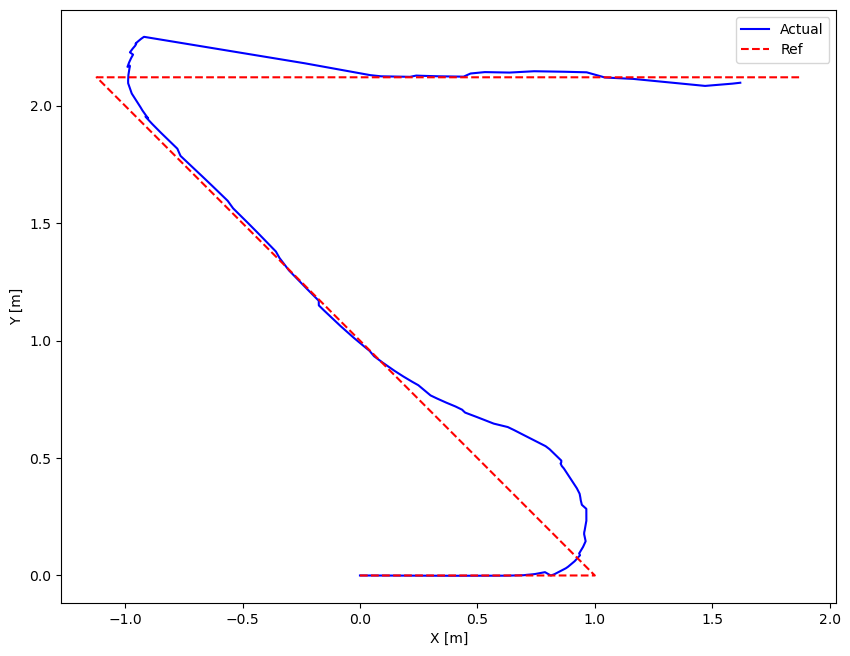

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["x"], df["y"], label="Actual", color="blue")
ax.plot(PathC[:, 0], PathC[:, 1], label="Ref", linestyle="--", color="red")
ax.set_aspect('equal')
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.legend()
plt.show()

## Plot Velocity

Linear

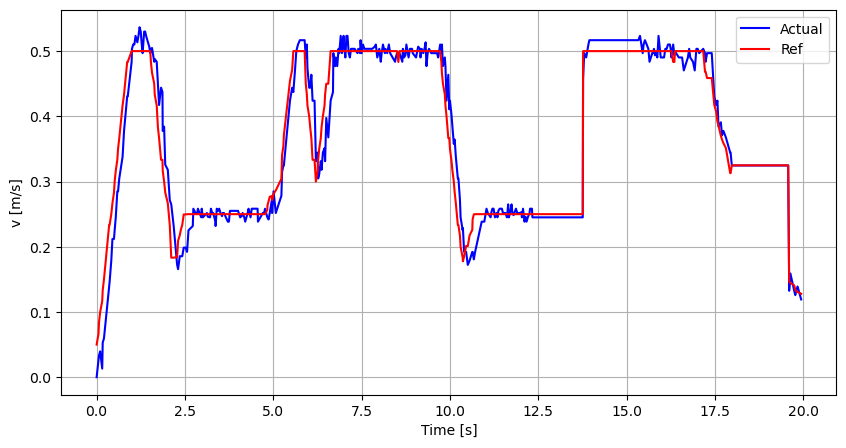

In [29]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["v_real"], label="Actual", color="blue")
ax.plot(t, df["v_cmd"], label="Ref", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("v [m/s]")
ax.grid()
ax.legend()
plt.show()

Angular

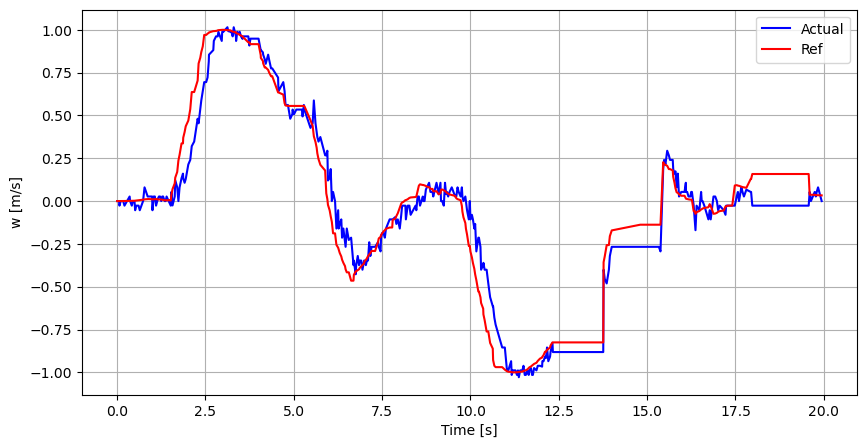

In [30]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["w_real"], label="Actual", color="blue")
ax.plot(t, df["w_cmd"], label="Ref", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("w [m/s]")
ax.grid()
ax.legend()
plt.show()

Near the goal, the robot did not finish its navigation for a while, I will fix this

## Plot Position Profile

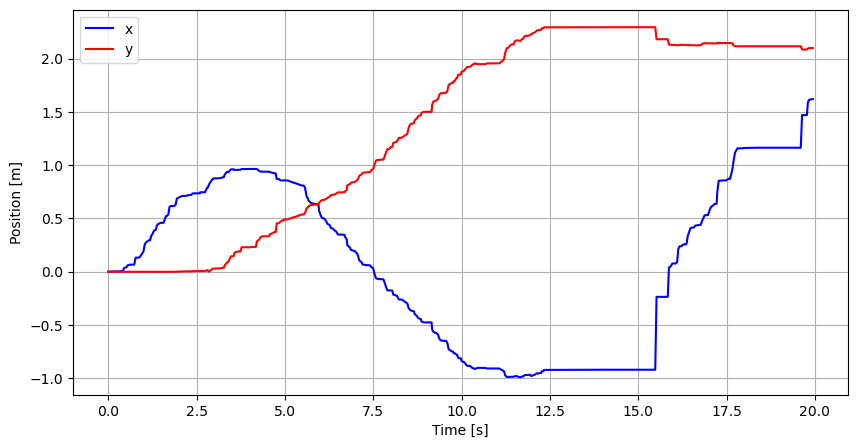

In [31]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["x"], label="x", color="blue")
ax.plot(t, df["y"], label="y", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Position [m]")
ax.grid()
ax.legend()
plt.show()

## Plot current

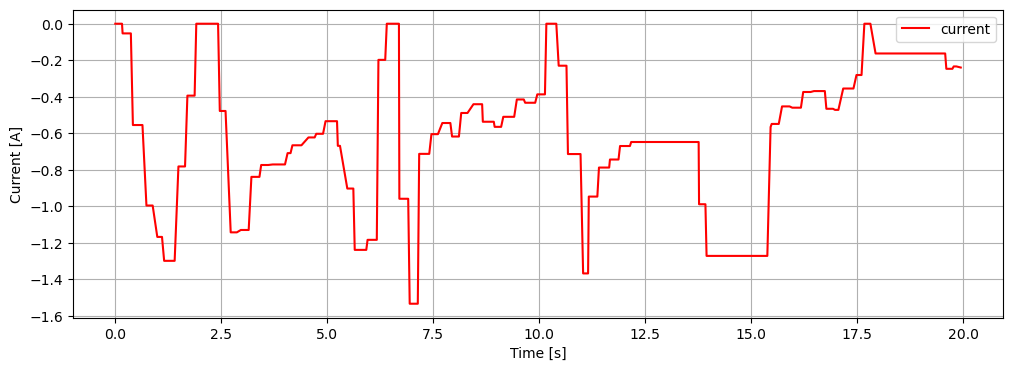

In [32]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["battery_i"], label="current", color="red")
# ax.set_aspect('equal')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")
ax.grid()
ax.legend()
plt.show()

Maybe there is an offset...? about -0.3 [A]

## Calc RMSE

In [33]:
from scipy.spatial.distance import cdist

def calc_rmse(robot_path: np.ndarray, path: np.ndarray) -> float:

    # Compute the distances between each point on the robot trajectory and each point on the path at once (using scipy's cdist)
    # distance_matrix has shape = (number of points in the robot trajectory, number of points in the path)
    distance_matrix = cdist(robot_path, path, metric='euclidean')

    # Take the minimum along the row direction to extract the minimum distance for each robot point
    min_distances = np.min(distance_matrix, axis=1)

    # Compute RMSE
    rmse = np.sqrt(np.mean(min_distances**2))
    
    return rmse


In [34]:
robot_x = df["x"].to_numpy()
robot_y = df["y"].to_numpy()
robot_path = np.c_[robot_x, robot_y]

rmse = calc_rmse(robot_path, PathC)
print(f"RMSE: {rmse:.4f} m")

RMSE: 0.0868 m


## Plot PathB

In [35]:
from matplotlib import pyplot as plt
# 経路の描画
plt.figure(figsize=(8, 8))
plt.plot(path_B[:, 0], path_B[:, 1], 'k--', label="Reference", linewidth=3)
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'path_B' is not defined

<Figure size 800x800 with 0 Axes>